In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras

from toolbox import arruma_dados

2024-11-14 11:58:17.720623: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-14 11:58:18.840266: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### __Deep Learning workflow:__
<font size=3>
    
1. Import and data pre-processing;   
2. Neural network modeling;
3. Model compilation;
4. Train and validation;
5. Final training;
6. Test evaluation;
7. Saving the model.

### __1. Import and data pre-processing:__
<font size=3>
    
1.1 Import data;\
1.2 Train, validation, and test tensor divition.

Our first task will classify _normal_ and _abnormal_ orthopedic diagnoses from biomechanical features. Our data can be downloaded from the [Kaggle datasets](https://www.kaggle.com/datasets/uciml/biomechanical-features-of-orthopedic-patients?resource=download).

In [2]:
df = pd.read_csv("../dataset/column_2C_weka.csv")

df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [3]:
(X_train, y_train), (X_test, y_test), df = arruma_dados(df)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

/home/tiberio/bioinfo/intro_deep-learning/1-intro/toolbox.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['class'].apply(lambda x: 1.0 if x == 'Abnormal' else 0.0)


((263, 6), (263, 1), (47, 6), (47, 1))

In [4]:
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class,label
56,43.349606,7.467469,28.065483,35.882137,112.776187,5.753277,Abnormal,1.0
227,61.540599,19.676957,52.892229,41.863642,118.686268,4.815031,Normal,0.0
62,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Abnormal,1.0
40,35.492446,11.701672,15.590363,23.790774,106.938852,-3.460358,Abnormal,1.0
59,48.109236,14.930725,35.564683,33.178512,124.056452,7.947905,Abnormal,1.0


### __2. Neural network modeling:__
<font size=3>
    
2.1 Define initial layer's shape;\
2.2 Define output layer's shape and its [activation function](https://keras.io/api/layers/activations/);\
2.3 Define hidden layers.

[Checkout Keras API](https://keras.io/guides/functional_api/).

In [5]:
inputs = keras.Input(shape=(X_train.shape[1],))

x = keras.layers.Dense(50, activation='sigmoid')(inputs)

outputs = keras.layers.Dense(1, activation='sigmoid')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

2024-11-14 11:58:20.594918: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 50)             │           350 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 401 (1.57 KB)

 Trainable params: 401 (1.57 KB)

 Non-trainable params: 0 (0.00 B)

### __3. Model compilation:__
<font size=3>

3.1 Define [optimizer](https://keras.io/api/optimizers/);\
3.2 Define [loss function](https://keras.io/api/losses/);\
3.3 Define [validation metric](https://keras.io/api/metrics/).


In [6]:
model.compile(optimizer='SGD', loss="mse")

### __4. Train and validation__
<font size=3>

We'll skip to the __Final training__ since we want to make a naive model. In the next notebook, we'll make all the steps in detail.    

### __5. Final training__
<font size=3>

Once the modeling is completed, we concatenate train and validation data to fit again the model.

__Note:__ use the same number of epochs from the previous step.
    

In [ ]:
report = model.fit(x=X_train, y=y_train, epochs=20)

In [ ]:
report.history

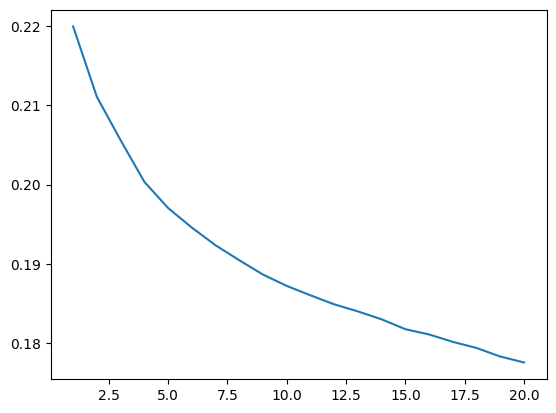

In [9]:
loss = report.history['loss']
epochs = np.linspace(1, len(loss), len(loss))

plt.plot(epochs, loss)
plt.show()

### __6. Test evaluation__:

    6.1 Make the evaluation using the test data;
    6.1 Make some predictions to visualize the results;
   

In [10]:
model.evaluate(x=X_test, y=y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1799 


0.1767200529575348

In [11]:
pred = model.predict(X_test)

for p, y in zip(pred, y_test):
    
    label = 1.0 if p > 0.5 else 0.0
    
    print(f"pred = {p[0]:.3f}, label = {label}, y-test = {y[0]}")
        

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
pred = 0.561, label = 1.0, y-test = 0.0
pred = 0.595, label = 1.0, y-test = 1.0
pred = 0.769, label = 1.0, y-test = 1.0
pred = 0.563, label = 1.0, y-test = 0.0
pred = 0.779, label = 1.0, y-test = 1.0
pred = 0.562, label = 1.0, y-test = 1.0
pred = 0.537, label = 1.0, y-test = 1.0
pred = 0.788, label = 1.0, y-test = 1.0
pred = 0.562, label = 1.0, y-test = 0.0
pred = 0.760, label = 1.0, y-test = 1.0
pred = 0.623, label = 1.0, y-test = 1.0
pred = 0.722, label = 1.0, y-test = 1.0
pred = 0.566, label = 1.0, y-test = 0.0
pred = 0.786, label = 1.0, y-test = 1.0
pred = 0.561, label = 1.0, y-test = 0.0
pred = 0.565, label = 1.0, y-test = 1.0
pred = 0.766, label = 1.0, y-test = 1.0
pred = 0.561, label = 1.0, y-test = 0.0
pred = 0.562, label = 1.0, y-test = 1.0
pred = 0.562, label = 1.0, y-test = 0.0
pred = 0.767, label = 1.0, y-test = 1.0
pred = 0.561, label = 1.0, y-test = 0.0
pred = 0.757, label = 1.0, y-test = 1.0
pred = 0.565, label = 1.0, y-test = 0.0
pr

### __7. Saving the model__:
<font size=3>
    
[Checkout](https://keras.io/guides/serialization_and_saving/).